<h1 align=center><font size = 20>Data Preparation</font></h1>



# **Data Preparation**

> **What is data preparation process?**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

## **📤 Import Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 💾 Read Data

In [236]:
df=pd.read_csv("Detection of COVID-19 Infection from Routine Blood Exams.csv")
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [237]:
df.shape

(279, 16)

In [238]:
df.corr()['TARGET'].sort_values()

Monociti     -0.193461
Eosinofili   -0.098190
ALP          -0.095880
WBC          -0.032397
GGT          -0.013642
Neutrofili    0.019409
Piastrine     0.030131
Basofili      0.057408
AGE           0.096823
ALT           0.223103
AST           0.248244
PCR           0.302248
LDH           0.432503
TARGET        1.000000
Name: TARGET, dtype: float64

### 🟣 **Remove the outliers**

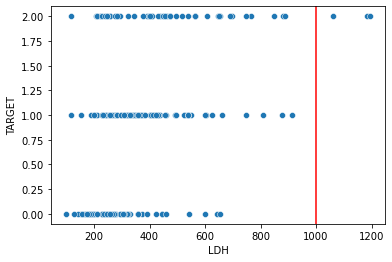

In [239]:
sns.scatterplot(data=df,x='LDH',y='TARGET')
plt.axvline(x=1000,color='red')

In [240]:
df[(df['LDH']>1000) & (df['TARGET']==2)][['LDH','TARGET']]

,LDH,TARGET
25,1183.0,2
28,1195.0,2
60,1061.0,2


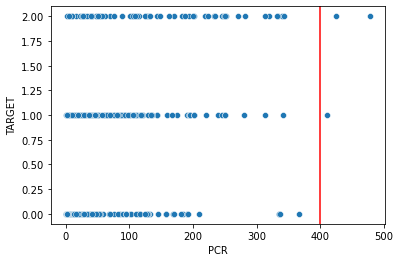

In [241]:
sns.scatterplot(data=df,x='PCR',y='TARGET')
plt.axvline(x=400,color='r')

In [242]:
df[(df['PCR']>400) & (df['TARGET']==2)][['PCR','TARGET']]

,PCR,TARGET
15,478.0,2
52,425.0,2


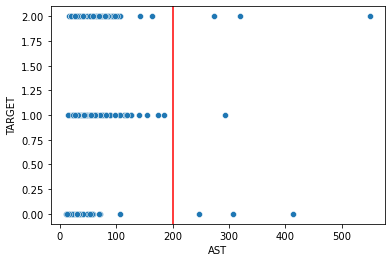

In [243]:
sns.scatterplot(data=df,x='AST',y='TARGET')
plt.axvline(x=200,color='r')

In [244]:
df[(df['AST']>200) & (df['TARGET']==2)][['AST','TARGET']]

,AST,TARGET
15,320.0,2
60,550.0,2
70,273.0,2


In [245]:
index_drop=df[(df['LDH']>1000) & (df['TARGET']==2)][['LDH','TARGET']].index
index_drop=index_drop.append(df[(df['PCR']>400) & (df['TARGET']==2)][['PCR','TARGET']].index)
index_drop

Int64Index([25, 28, 60, 15, 52], dtype='int64')

In [246]:
df=df.drop(index_drop,axis=0)

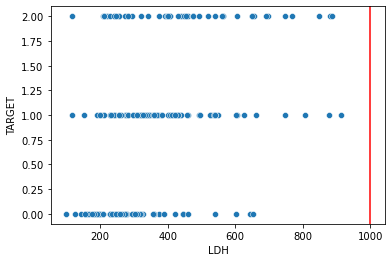

In [247]:
sns.scatterplot(data=df,x='LDH',y='TARGET')
plt.axvline(x=1000,color='red')

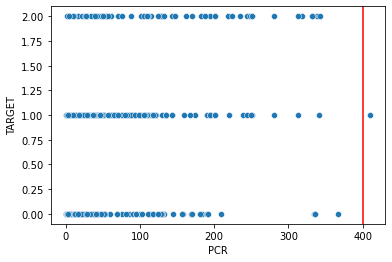

In [248]:
sns.scatterplot(data=df,x='PCR',y='TARGET')
plt.axvline(x=400,color='r')

In [249]:
index_drop=df[(df['PCR']>400) & (df['TARGET']==1)][['PCR','TARGET']].index
df[(df['PCR']>400) & (df['TARGET']==1)][['PCR','TARGET']]

,PCR,TARGET
154,410.0,1


In [250]:
df=df.drop(index_drop,axis=0)

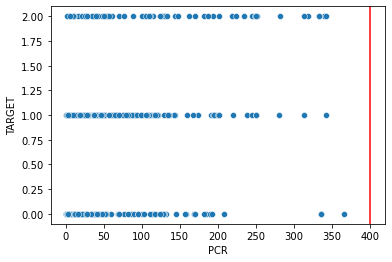

In [251]:
sns.scatterplot(data=df,x='PCR',y='TARGET')
plt.axvline(x=400,color='r')

In [252]:
index_drop=df[(df['PCR']>300) & (df['TARGET']==0)][['PCR','TARGET']].index
df[(df['PCR']>300) & (df['TARGET']==0)][['PCR','TARGET']]
index_drop

Int64Index([200, 204, 220, 248], dtype='int64')

### **🟣 Dropping Rows:**

In [253]:
df=df.drop(index_drop,axis=0)

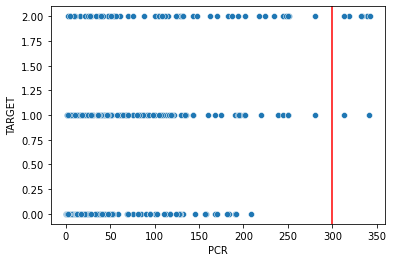

In [254]:
sns.scatterplot(data=df,x='PCR',y='TARGET')
plt.axvline(x=300,color='r')

<AxesSubplot:xlabel='TARGET', ylabel='LDH'>

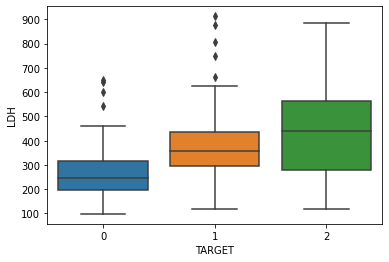

In [255]:
sns.boxplot(data=df,x='TARGET',y='LDH')

In [256]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 278
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SESSO       269 non-null    object 
 1   AGE         269 non-null    int64  
 2   WBC         267 non-null    float64
 3   Piastrine   267 non-null    float64
 4   Neutrofili  201 non-null    float64
 5   Linfociti   201 non-null    object 
 6   Monociti    201 non-null    float64
 7   Eosinofili  201 non-null    float64
 8   Basofili    200 non-null    float64
 9   PCR         263 non-null    float64
 10  AST         267 non-null    float64
 11  ALT         257 non-null    float64
 12  ALP         126 non-null    float64
 13  GGT         133 non-null    float64
 14  LDH         187 non-null    float64
 15  TARGET      269 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 43.8+ KB


In [257]:
100*(df.isnull().sum()/len(df))

SESSO          0.000000
AGE            0.000000
WBC            0.743494
Piastrine      0.743494
Neutrofili    25.278810
Linfociti     25.278810
Monociti      25.278810
Eosinofili    25.278810
Basofili      25.650558
PCR            2.230483
AST            0.743494
ALT            4.460967
ALP           53.159851
GGT           50.557621
LDH           30.483271
TARGET         0.000000
dtype: float64

## **A. How Much Data is Missing?**


### **🟣 Make a Function to calculate the percent of missing data in each columns (feature) and then sort it**

In [258]:
def MissingPercent(df):
    nanPercent=100*(df.isnull().sum()/len(df))
    nanPercent=nanPercent[nanPercent>0].sort_values()
    return nanPercent

In [259]:
nanPercent=MissingPercent(df)

In [260]:
nanPercent

WBC            0.743494
Piastrine      0.743494
AST            0.743494
PCR            2.230483
ALT            4.460967
Neutrofili    25.278810
Linfociti     25.278810
Monociti      25.278810
Eosinofili    25.278810
Basofili      25.650558
LDH           30.483271
GGT           50.557621
ALP           53.159851
dtype: float64

### **🟣 Plot the feature with missing indicating the percent of missing data:**

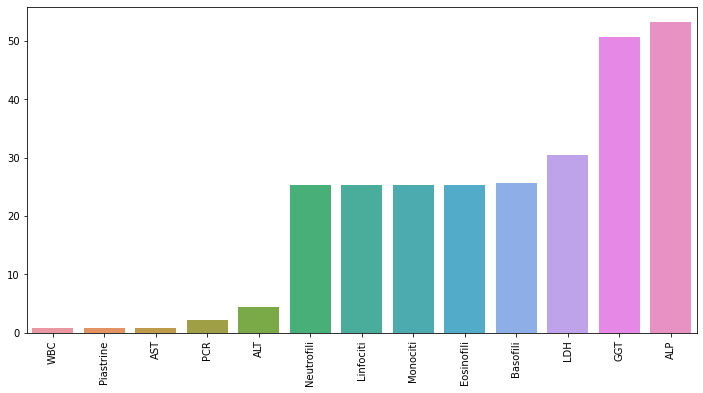

In [261]:
plt.figure(figsize=(12,6))
sns.barplot(x=nanPercent.index,y=nanPercent)
plt.xticks(rotation=90);

In [262]:
df[df['WBC'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [263]:
df[df['Piastrine'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [264]:
df[df['AST'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [265]:
df=df.dropna(axis=0,subset=['WBC','AST','Piastrine'])

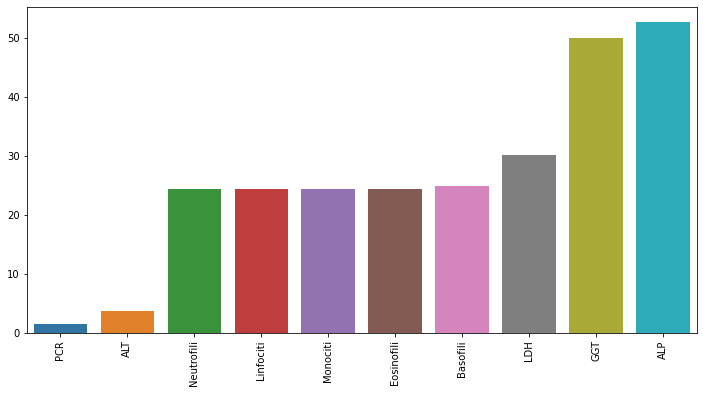

In [266]:
nanPercent=MissingPercent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nanPercent.index,y=nanPercent)
plt.xticks(rotation=90);

In [267]:
df[df['Neutrofili'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
10,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,2
26,M,76,18.3,520.0,NaN,NaN,NaN,NaN,NaN,217.9,40.0,26.0,NaN,NaN,NaN,2
27,M,76,23.3,346.0,NaN,NaN,NaN,NaN,NaN,125.4,57.0,30.0,NaN,NaN,767.0,2
31,F,71,17.7,179.0,NaN,NaN,NaN,NaN,NaN,61.0,65.0,16.0,NaN,NaN,880.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,M,83,21.4,398.0,NaN,NaN,NaN,NaN,NaN,192.0,29.0,68.0,NaN,25.0,308.0,0
269,M,30,8.2,211.0,NaN,NaN,NaN,NaN,NaN,12.4,35.0,41.0,56.0,17.0,209.0,0
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0


In [268]:
df[df['Linfociti'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
10,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,2
26,M,76,18.3,520.0,NaN,NaN,NaN,NaN,NaN,217.9,40.0,26.0,NaN,NaN,NaN,2
27,M,76,23.3,346.0,NaN,NaN,NaN,NaN,NaN,125.4,57.0,30.0,NaN,NaN,767.0,2
31,F,71,17.7,179.0,NaN,NaN,NaN,NaN,NaN,61.0,65.0,16.0,NaN,NaN,880.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,M,83,21.4,398.0,NaN,NaN,NaN,NaN,NaN,192.0,29.0,68.0,NaN,25.0,308.0,0
269,M,30,8.2,211.0,NaN,NaN,NaN,NaN,NaN,12.4,35.0,41.0,56.0,17.0,209.0,0
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0


In [269]:
df[df['Monociti'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
10,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,2
26,M,76,18.3,520.0,NaN,NaN,NaN,NaN,NaN,217.9,40.0,26.0,NaN,NaN,NaN,2
27,M,76,23.3,346.0,NaN,NaN,NaN,NaN,NaN,125.4,57.0,30.0,NaN,NaN,767.0,2
31,F,71,17.7,179.0,NaN,NaN,NaN,NaN,NaN,61.0,65.0,16.0,NaN,NaN,880.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,M,83,21.4,398.0,NaN,NaN,NaN,NaN,NaN,192.0,29.0,68.0,NaN,25.0,308.0,0
269,M,30,8.2,211.0,NaN,NaN,NaN,NaN,NaN,12.4,35.0,41.0,56.0,17.0,209.0,0
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0


In [270]:
df[df['Eosinofili'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
10,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,2
26,M,76,18.3,520.0,NaN,NaN,NaN,NaN,NaN,217.9,40.0,26.0,NaN,NaN,NaN,2
27,M,76,23.3,346.0,NaN,NaN,NaN,NaN,NaN,125.4,57.0,30.0,NaN,NaN,767.0,2
31,F,71,17.7,179.0,NaN,NaN,NaN,NaN,NaN,61.0,65.0,16.0,NaN,NaN,880.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,M,83,21.4,398.0,NaN,NaN,NaN,NaN,NaN,192.0,29.0,68.0,NaN,25.0,308.0,0
269,M,30,8.2,211.0,NaN,NaN,NaN,NaN,NaN,12.4,35.0,41.0,56.0,17.0,209.0,0
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0


In [271]:
df[df['Basofili'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
5,M,77,3.0,162.0,2.0,0.4,0.4,0.1,NaN,NaN,21.0,10.0,NaN,NaN,220.0,2
10,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,2
26,M,76,18.3,520.0,NaN,NaN,NaN,NaN,NaN,217.9,40.0,26.0,NaN,NaN,NaN,2
27,M,76,23.3,346.0,NaN,NaN,NaN,NaN,NaN,125.4,57.0,30.0,NaN,NaN,767.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,M,83,21.4,398.0,NaN,NaN,NaN,NaN,NaN,192.0,29.0,68.0,NaN,25.0,308.0,0
269,M,30,8.2,211.0,NaN,NaN,NaN,NaN,NaN,12.4,35.0,41.0,56.0,17.0,209.0,0
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0


### **🟣 Filling the missing values:**


In [272]:
df['Neutrofili'].unique()

array([ 1.9,  2.1,  nan, 14. ,  2. ,  3.3,  4.2, 10. ,  6.2,  4.5,  6.8,
        9.7,  8.1,  5.3,  3.9,  6.3,  7.1,  4.3,  4.8,  3.1, 16.1,  9. ,
       14.4,  4.4,  4.1, 12.9,  9.6,  5.9,  8.8,  3.4, 16. , 15.7, 15.9,
        7.6,  5.7,  6.9,  4. , 17.6, 10.7,  4.7,  3.5,  6.7,  8.9,  5.1,
        5. ,  2.7,  1.4,  1.2,  9.2,  3.8,  8. ,  5.2,  2.4,  5.6,  2.8,
        2.6,  3.7, 13. ,  5.8,  7.4,  5.4, 12.2,  9.1,  3.2,  9.3,  3. ,
        3.6,  8.2,  0.8,  1.8,  6.5,  2.2,  7.3,  1.5,  2.5,  0.9,  2.9,
       26.4, 13.5,  5.5,  1.1, 24.3, 10.5,  7.9, 13.9,  7.5,  9.5, 17.3,
       16.5, 10.8, 12. ,  9.4, 14.1])

In [273]:
df['Neutrofili']=df['Neutrofili'].fillna(df['Neutrofili'].mean())

In [274]:
df['Linfociti'].unique()

array(['0.8', '0.9', nan, '1.2', '0.4', '1.3', '0.6', '0.5', '1', '2.3',
       '2.7', '0.7', '0.3', '0.2', '1.4', '1.1', '0-4', '1.5', '1.6',
       '1.7', '2.4', '1.9', '2.2', '2', '2.9', '7.2', '3.3', '3.6', '1.8',
       '4.1', '2.1', '3.1', '2.5', '3', '2.6'], dtype=object)

In [275]:
df['Linfociti'] = pd.to_numeric(df['Linfociti'],errors='coerce')
df['Linfociti']=df['Linfociti'].fillna(df['Linfociti'].mean())

In [276]:
df['Monociti'].unique()

array([0.2, 0.4, nan, 0.3, 0.7, 0.6, 0.8, 0.5, 1.1, 1. , 1.5, 0. , 1.7,
       1.2, 0.9, 0.1, 1.3, 3.2, 1.4, 2.1, 2.5, 2. , 1.6])

In [277]:
df['Monociti']=df['Monociti'].fillna(df['Monociti'].mean())

In [278]:
df['Eosinofili'].unique()

array([0. , nan, 0.1, 0.2, 0.3, 0.5, 0.4, 0.6, 1.3])

In [279]:
df['Eosinofili']=df['Eosinofili'].fillna(df['Eosinofili'].mean())

In [280]:
df['Basofili'].unique()

array([0. , nan, 0.1, 0.3])

In [281]:
df['Basofili']=df['Basofili'].fillna(df['Basofili'].mean())

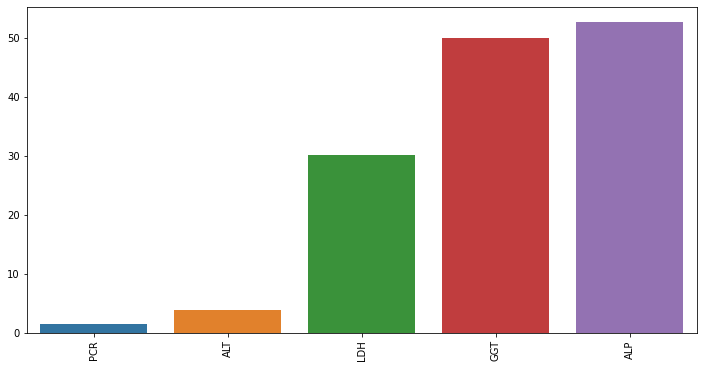

In [282]:
nanPercent=MissingPercent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nanPercent.index,y=nanPercent)
plt.xticks(rotation=90);

In [283]:
df[df['PCR'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
5,M,77,3.0,162.0,2.0,0.4,0.4,0.1,0.014,NaN,21.0,10.0,NaN,NaN,220.0,2
11,M,84,7.8,167.0,6.2,0.9,0.7,0.0,0.000,NaN,33.0,29.0,NaN,NaN,NaN,2
19,M,85,5.7,205.0,3.9,1.3,0.5,0.0,0.000,NaN,87.0,31.0,87.0,26.0,494.0,2
255,M,80,10.1,325.0,7.6,1.7,0.6,0.2,0.000,NaN,19.0,23.0,NaN,NaN,NaN,0


In [284]:
df[df['ALT'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
9,M,75,7.2,26.0,6.2,0.6,0.3,0.1,0.0,248.2,85.0,NaN,130.0,NaN,453.0,2
16,M,18,6.2,228.0,4.5,1.0,0.4,0.1,0.0,70.1,163.0,NaN,47.0,NaN,397.0,2
17,M,41,11.3,384.0,8.1,2.3,0.7,0.1,0.1,27.0,65.0,NaN,145.0,NaN,282.0,2
30,M,70,10.5,119.0,9.0,0.8,0.7,0.0,0.0,182.3,93.0,NaN,56.0,147.0,697.0,2
43,M,68,11.2,308.0,9.6,0.9,0.6,0.1,0.0,170.4,78.0,NaN,75.0,NaN,NaN,2
62,F,70,20.0,332.0,17.6,0.9,1.2,0.2,0.3,25.6,41.0,NaN,100.0,NaN,539.0,2
63,F,70,12.0,308.0,10.7,0.8,0.5,0.0,0.0,187.6,86.0,NaN,106.0,87.0,NaN,2
68,M,37,8.9,387.0,6.7,1.2,0.4,0.5,0.1,162.4,59.0,NaN,55.0,NaN,562.0,2
74,F,29,6.6,297.0,5.0,1.1,0.5,0.0,0.0,43.3,29.0,NaN,NaN,13.0,548.0,1
140,M,67,6.7,390.0,5.9,0.6,0.2,0.0,0.0,341.6,293.0,NaN,99.0,NaN,878.0,1


### **🟣 Remove the Columns with more than 80% missing values**

In [285]:
df=df.drop(['GGT','ALP'],axis=1)


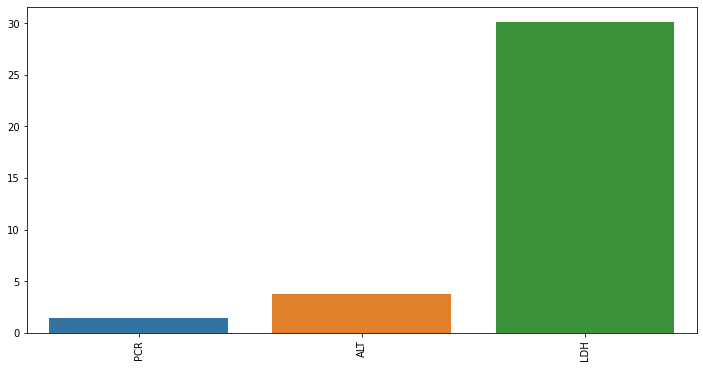

In [286]:
nanPercent=MissingPercent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nanPercent.index,y=nanPercent)
plt.xticks(rotation=90);

In [287]:
df['PCR'].unique()
df['PCR']=df['PCR'].fillna(df['PCR'].mean())

In [288]:
df['ALT'].unique()
df['ALT']=df['ALT'].fillna(df['ALT'].mean())

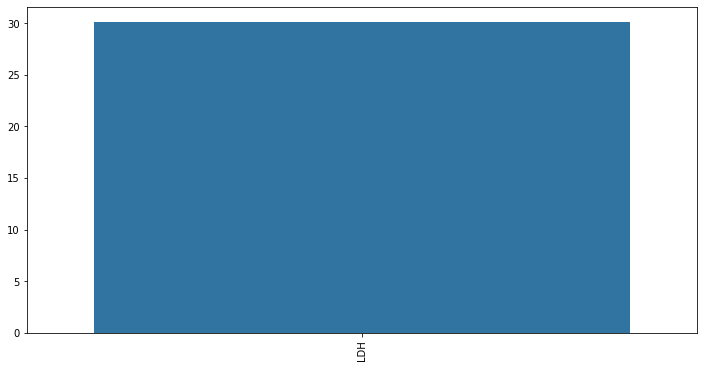

In [289]:
nanPercent=MissingPercent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nanPercent.index,y=nanPercent)
plt.xticks(rotation=90);

In [290]:
df['LDH'].unique()

array([257., 207.,  nan, 651., 220., 117., 391., 439., 453., 210., 407.,
       375., 397., 282., 494., 408., 211., 431., 461., 767., 655., 697.,
       880., 230., 245., 343., 241., 747., 848., 474., 887., 565., 400.,
       475., 449., 518., 274., 294., 246., 606., 539., 455., 281., 562.,
       690., 459., 548., 272., 340., 529., 493., 321., 435., 913., 355.,
       605., 244., 297., 379., 428., 524., 324., 540., 275., 372., 242.,
       318., 228., 538., 626., 347., 403., 416., 401., 358., 748., 456.,
       328., 311., 406., 421., 346., 432., 198., 320., 153., 363., 601.,
       307., 369., 255., 878., 263., 808., 334., 424., 414., 190., 661.,
       384., 495., 308., 423., 359., 154., 229., 254., 252., 374., 445.,
       643., 209., 201., 237., 278.,  98., 142., 184., 235., 126., 182.,
       541., 179., 160., 193., 444., 187., 298., 199., 243., 273., 389.,
       168., 317., 196., 422., 652., 183., 156., 304., 357., 175., 266.,
       258.])

<AxesSubplot:xlabel='SESSO', ylabel='LDH'>

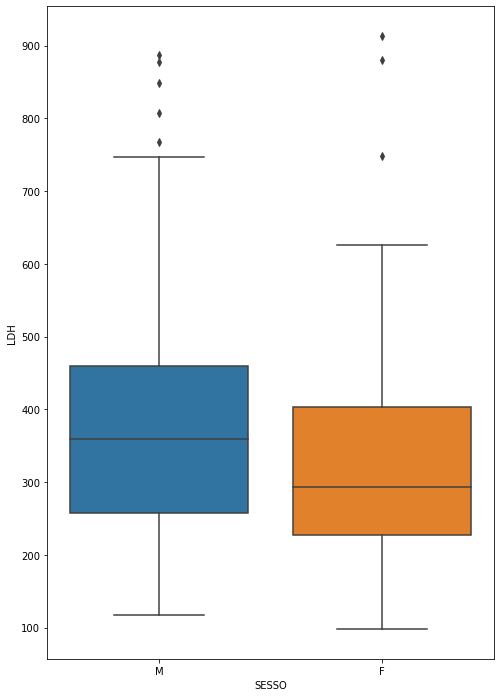

In [291]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df,x='SESSO',y='LDH')

## **D. Imputation of Missing Data**


In [292]:
df.groupby('SESSO')['LDH'].mean()

SESSO
F    334.557377
M    385.896000
Name: LDH, dtype: float64

In [297]:
df['LDH']=df.groupby('SESSO')['LDH'].transform(lambda x:x.fillna(x.mean()))

In [299]:
nanPercent=MissingPercent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nanPercent.index,y=nanPercent)
plt.xticks(rotation=90);

ValueError: min() arg is an empty sequence

<Figure size 864x432 with 0 Axes>

In [300]:
nanPercent=MissingPercent(df)
nanPercent

Series([], dtype: float64)

# **1. Dealing with Outliers**

**Definition:**

**In Statistics, an outlier is a data point that differs significantly from other observations (Grubbs, 1969; Maddala, 1992).**

**An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set (Grubbs, 1969).**

**Anoutlier can couse serious problem in statistical analysis.**

* [Wikipedia Article](http://en.wikipedia.org/wiki/Outlier)


# **2. Dealing with Missing Data**

**In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.**

[Wikipedia Article](http://en.wikipedia.org/wiki/Missing_data)


### **B. Working base on Rows Missing Data**

**If only a few rows are missing some values, then it might just be a good idea to drop those rows.** 

**What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.**


**Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category.** 

(Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!)

**every Feature with missing data must be checked!**

**We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,then we will consider just dropping that rows**

# **Now, we don't have any Missing Data**

## Best Wishes!


